In [1]:
!nvidia-smi

Fri Sep 11 05:36:43 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.66       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8     7W /  75W |      0MiB /  7611MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!pip install tensorflow-gpu

     |████████████████████████████████| 320.4MB 50kB/s 


In [3]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [4]:
# re-size all the images to the size 244x244
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/My Drive/Python Projects/Car Brand Classification using Deep Learning/Datasets/Train'
valid_path = '/content/drive/My Drive/Python Projects/Car Brand Classification using Deep Learning/Datasets/Test'

In [5]:
# Import the ResNet50 library as shown below and add preprocessing layer to the front of ResNet50
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94773248/94765736 [==============================] - 1s 0us/step


In [6]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [7]:
  # useful for getting number of output classes
folders = glob('/content/drive/My Drive/Python Projects/Car Brand Classification using Deep Learning/Datasets/Train/*')

In [8]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [10]:
# view the structure of the model
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [11]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [12]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

#WE dont do other operations such as sheer range,flip,zoom on test data
test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/Python Projects/Car Brand Classification using Deep Learning/Datasets/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [15]:
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/Python Projects/Car Brand Classification using Deep Learning/Datasets/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [16]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=60,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/60
2/2 [==============================] - 28s 14s/step - loss: 7.6994 - accuracy: 0.3125 - val_loss: 3.9096 - val_accuracy: 0.1724
Epoch 2/60
2/2 [==============================] - 1s 388ms/step - loss: 5.1260 - accuracy: 0.3594 - val_loss: 5.5172 - val_accuracy: 0.3276
Epoch 3/60
2/2 [==============================] - 1s 375ms/step - loss: 8.0215 - accuracy: 0.3906 - val_loss: 3.8008 - val_accuracy: 0.4828
Epoch 4/60
2/2 [==============================] - 1s 370ms/step - loss: 6.7590 - accuracy: 0.4688 - val_loss: 3.0365 - val_accuracy: 0.5517
Epoch 5/60
2/2 [==============================] - 1s 379ms/step - loss: 3.2955 - accuracy: 0.3906 - val_loss: 2.6626 - val_accuracy: 0.2241
Epoch 6/60
2/2 [==============================] - 1s 384ms/step - loss: 2.7987 - accuracy: 0.4219 - val_loss: 5.5493 - val_accuracy: 0.1552
Epoch 7/60
2/2 [==============================] - 1s 376ms/step - loss: 2.8404 - accu

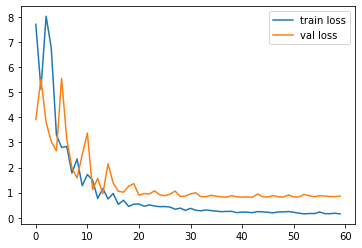

<Figure size 432x288 with 0 Axes>

In [17]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()


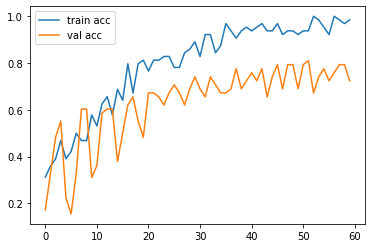

<Figure size 432x288 with 0 Axes>

In [19]:
# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()


In [20]:
# save it as a h5 file
from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [21]:
y_pred = model.predict(test_set)

In [22]:
y_pred

array([[2.09523495e-02, 7.18069315e-01, 2.60978311e-01],
       [2.99522956e-03, 1.96923055e-02, 9.77312446e-01],
       [1.41969547e-01, 5.60332179e-01, 2.97698319e-01],
       [7.02191070e-02, 4.01247740e-01, 5.28533161e-01],
       [3.73783819e-02, 1.09543478e-04, 9.62512016e-01],
       [4.41030264e-02, 5.84955327e-03, 9.50047433e-01],
       [6.99908733e-01, 9.37334634e-03, 2.90717959e-01],
       [6.48551702e-01, 2.68062502e-01, 8.33858326e-02],
       [5.90170640e-03, 9.59635019e-01, 3.44632976e-02],
       [1.04425386e-01, 6.87022448e-01, 2.08552152e-01],
       [1.93796214e-02, 3.50621343e-01, 6.29998982e-01],
       [1.66957965e-03, 9.90929663e-01, 7.40075624e-03],
       [8.24369311e-01, 9.49393734e-02, 8.06913748e-02],
       [9.19387579e-01, 4.54445519e-02, 3.51678096e-02],
       [8.51150020e-04, 7.39399314e-01, 2.59749562e-01],
       [5.38039804e-02, 4.09539431e-01, 5.36656618e-01],
       [2.07173124e-01, 4.55019325e-01, 3.37807566e-01],
       [7.88830593e-03, 9.26338